In [18]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
#importing dataset
ds = pd.read_csv('/content/insurance.csv')
print(ds.shape)
ds.head()


(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


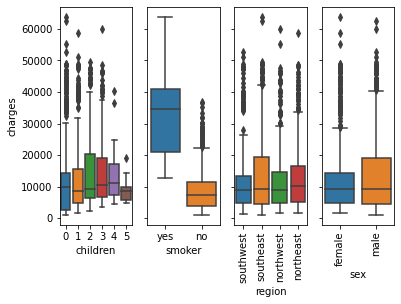

In [20]:
fig, axes = plt.subplots(1,4,sharey=True) #We will plot children, smoker, region, sex; 

plot_children = sns.boxplot(y= 'charges', x="children", data=ds,  orient='v' , ax=axes[0])
plot_smoker = sns.boxplot(y= 'charges',x="smoker", data=ds,  orient='v' , ax=axes[1])
plot_region = sns.boxplot(y= 'charges',x="region", data=ds,  orient='v' , ax=axes[2])
plot_sex = sns.boxplot(y= 'charges',x="sex", data=ds,  orient='v' , ax=axes[3])
plot_region.set_xticklabels(labels=ds['region'].unique(),rotation = 90)
plot_sex.set_xticklabels(labels=ds['sex'].unique(),rotation = 90)
for i in axes[1:4]:
    i.set_ylabel('')   
    
plt.show()

In [6]:
#assigning dependent and independent variables
x = ds.iloc[:,:-1].values
y = ds.iloc[:,-1].values

In [30]:
#checking for missing values
ds.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

Encoding categorical data

In [8]:
#applying label encoding on column 1 and 4
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,1]=le.fit_transform(x[:,1])
x[:,4]=le.fit_transform(x[:,4])

In [9]:
print(x)

[[19 0 27.9 0 1 'southwest']
 [18 1 33.77 1 0 'southeast']
 [28 1 33.0 3 0 'southeast']
 ...
 [18 0 36.85 0 0 'southeast']
 [21 0 25.8 0 0 'southwest']
 [61 0 29.07 0 1 'northwest']]


In [10]:
#applying one hot encoding on column 5
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[5])],remainder = 'passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 0.0 ... 27.9 0 1]
 [0.0 0.0 1.0 ... 33.77 1 0]
 [0.0 0.0 1.0 ... 33.0 3 0]
 ...
 [0.0 0.0 1.0 ... 36.85 0 0]
 [0.0 0.0 0.0 ... 25.8 0 0]
 [0.0 1.0 0.0 ... 29.07 0 1]]


In [11]:
#splitting into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
x[0]

array([0.0, 0.0, 0.0, 1.0, 19, 0, 27.9, 0, 1], dtype=object)

Modelling

1. Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr=LinearRegression()
lr.fit(x_train,y_train)
lra = lr.score(x_test,y_test)
print(lr.score(x_test,y_test))

0.7999876970680434


2. Polynomial Regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 4)
x_new = pf.fit_transform(x_train)
plr=LinearRegression()
plr.fit(x_new,y_train)
lra2 = plr.score(pf.transform(x_test),y_test)
print(plr.score(pf.transform(x_test),y_test))

0.844461167137149


3. Decision Tree Regression

In [14]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dta = dt.score(x_test,y_test)
print(dt.score(x_test,y_test))

0.7521093226006283


4. Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(x_train, y_train)
rfa = rf.score(x_test,y_test)
print(rf.score(x_test,y_test))

0.8768283897172992


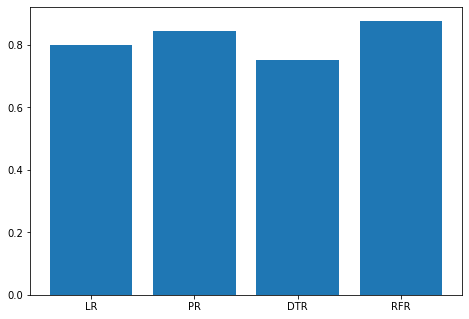

In [16]:
#comparing accuracy
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['LR', 'PR', 'DTR', 'RFR']
students = [lra,lra2,dta,rfa]
ax.bar(langs,students)
plt.show()